In [1]:
import sys
sys.path.append('../')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# df = pd.read_csv('Covtype_original.csv')
df = pd.read_csv(f'{Path.cwd()}/../datasets/Covtype_original.csv')

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# features_df = df.drop('Cover_Type', axis=1)
target_df = df[['Cover_Type']]

In [5]:
le = LabelEncoder()
target_encoded = le.fit_transform(target_df.to_numpy().ravel())
target_encoded_df = pd.DataFrame(target_encoded, columns=['Cover_Type'])

In [6]:
target_encoded_df.head()

,Cover_Type
0,4
1,4
2,1
3,1
4,4


In [7]:
df_to_save = df.copy(deep=True)

In [8]:
df_to_save['Cover_Type'] = target_encoded_df['Cover_Type']

In [9]:
df.compare(df_to_save)

Cover_Type      
             self other
0               5     4
1               5     4
2               2     1
3               2     1
4               5     4
...           ...   ...
581007          3     2
581008          3     2
581009          3     2
581010          3     2
581011          3     2

[581012 rows x 2 columns]

In [10]:
df_to_save.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,4


In [14]:
numerical_columns = [
  "Elevation", 
  "Aspect",
  "Slope",
  "Horizontal_Distance_To_Hydrology",
  "Vertical_Distance_To_Hydrology",
  "Horizontal_Distance_To_Roadways",
  "Hillshade_9am",
  "Hillshade_Noon",
  "Hillshade_3pm",
  "Horizontal_Distance_To_Fire_Points"
]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df_to_save.drop("Cover_Type", axis=1),
    df_to_save[["Cover_Type"]],
    test_size=50000,
    random_state=42, 
    stratify=df_to_save[["Cover_Type"]].to_numpy().ravel()
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((531012, 54), (50000, 54), (531012, 1), (50000, 1))

In [16]:
X_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
403164,3305,242,8,510,109,878,205,247,180,700,...,0,1,0,0,0,0,0,0,0,0
556287,3290,75,19,216,7,2241,240,200,83,4496,...,0,0,0,0,0,0,0,0,1,0
275367,2851,35,11,300,9,2520,219,215,130,960,...,1,0,0,0,0,0,0,0,0,0
212544,3037,58,6,150,6,1101,224,228,138,2336,...,0,0,0,0,0,0,0,0,0,0
163887,3106,96,10,42,4,5191,236,226,121,2133,...,0,0,0,0,0,0,0,0,0,0


In [12]:
merged_df = pd.concat([X_test, y_test], axis=1)

In [13]:
X_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
403164,3305,242,8,510,109,878,205,247,180,700,...,0,1,0,0,0,0,0,0,0,0
556287,3290,75,19,216,7,2241,240,200,83,4496,...,0,0,0,0,0,0,0,0,1,0
275367,2851,35,11,300,9,2520,219,215,130,960,...,1,0,0,0,0,0,0,0,0,0
212544,3037,58,6,150,6,1101,224,228,138,2336,...,0,0,0,0,0,0,0,0,0,0
163887,3106,96,10,42,4,5191,236,226,121,2133,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307237,3095,109,22,175,46,3205,251,208,72,2639,...,0,0,0,0,0,0,0,0,0,0
231190,3118,99,14,258,-64,1872,243,220,103,1490,...,0,0,0,0,0,0,0,0,0,0
489212,3376,296,21,926,247,4035,158,229,209,2439,...,1,0,0,0,0,0,0,0,0,0
156633,2900,323,18,212,48,2830,173,219,185,2627,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y_test['Cover_Type'].value_counts()

1    24380
0    18230
2     3077
6     1765
5     1495
4      817
3      236
Name: Cover_Type, dtype: int64

In [15]:
merged_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
403164,3305,242,8,510,109,878,205,247,180,700,...,1,0,0,0,0,0,0,0,0,0
556287,3290,75,19,216,7,2241,240,200,83,4496,...,0,0,0,0,0,0,0,1,0,0
275367,2851,35,11,300,9,2520,219,215,130,960,...,0,0,0,0,0,0,0,0,0,0
212544,3037,58,6,150,6,1101,224,228,138,2336,...,0,0,0,0,0,0,0,0,0,1
163887,3106,96,10,42,4,5191,236,226,121,2133,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307237,3095,109,22,175,46,3205,251,208,72,2639,...,0,0,0,0,0,0,0,0,0,0
231190,3118,99,14,258,-64,1872,243,220,103,1490,...,0,0,0,0,0,0,0,0,0,0
489212,3376,296,21,926,247,4035,158,229,209,2439,...,0,0,0,0,0,0,0,0,0,1
156633,2900,323,18,212,48,2830,173,219,185,2627,...,0,0,0,0,0,0,0,0,0,1


In [16]:
merged_df["Cover_Type"].value_counts().sort_index()

0    18230
1    24380
2     3077
3      236
4      817
5     1495
6     1765
Name: Cover_Type, dtype: int64

In [17]:
y_test['Cover_Type'].value_counts().sort_index()

0    18230
1    24380
2     3077
3      236
4      817
5     1495
6     1765
Name: Cover_Type, dtype: int64

In [25]:
# standard scale numerical columns
for col in numerical_columns:
    _scaler = StandardScaler()
    merged_df[col] = _scaler.fit_transform(merged_df[col].to_numpy().reshape(-1, 1))

In [28]:
merged_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
403164,1.238997,0.781523,-0.814607,1.126031,1.070866,-0.939869,-0.270557,1.197609,0.984578,-0.958543,...,1,0,0,0,0,0,0,0,0,0
556287,1.185477,-0.713049,0.655895,-0.253620,-0.675713,-0.065234,1.039082,-1.175607,-1.555663,1.903288,...,0,0,0,0,0,0,0,1,0,0
275367,-0.380869,-1.071030,-0.413561,0.140566,-0.641466,0.113800,0.253298,-0.418198,-0.324825,-0.762527,...,0,0,0,0,0,0,0,0,0,0
212544,0.282776,-0.865191,-1.081971,-0.563337,-0.692836,-0.796771,0.440390,0.238223,-0.115321,0.274849,...,0,0,0,0,0,0,0,0,0,1
163887,0.528968,-0.525109,-0.547243,-1.070147,-0.727083,1.827778,0.889409,0.137236,-0.560518,0.121806,...,0,0,0,0,0,0,0,0,0,0


In [18]:
merged_df.to_csv(f'{Path.cwd()}/../datasets/Covtype_preprocessed.csv', index=False)

Correlation matrix

<AxesSubplot: >

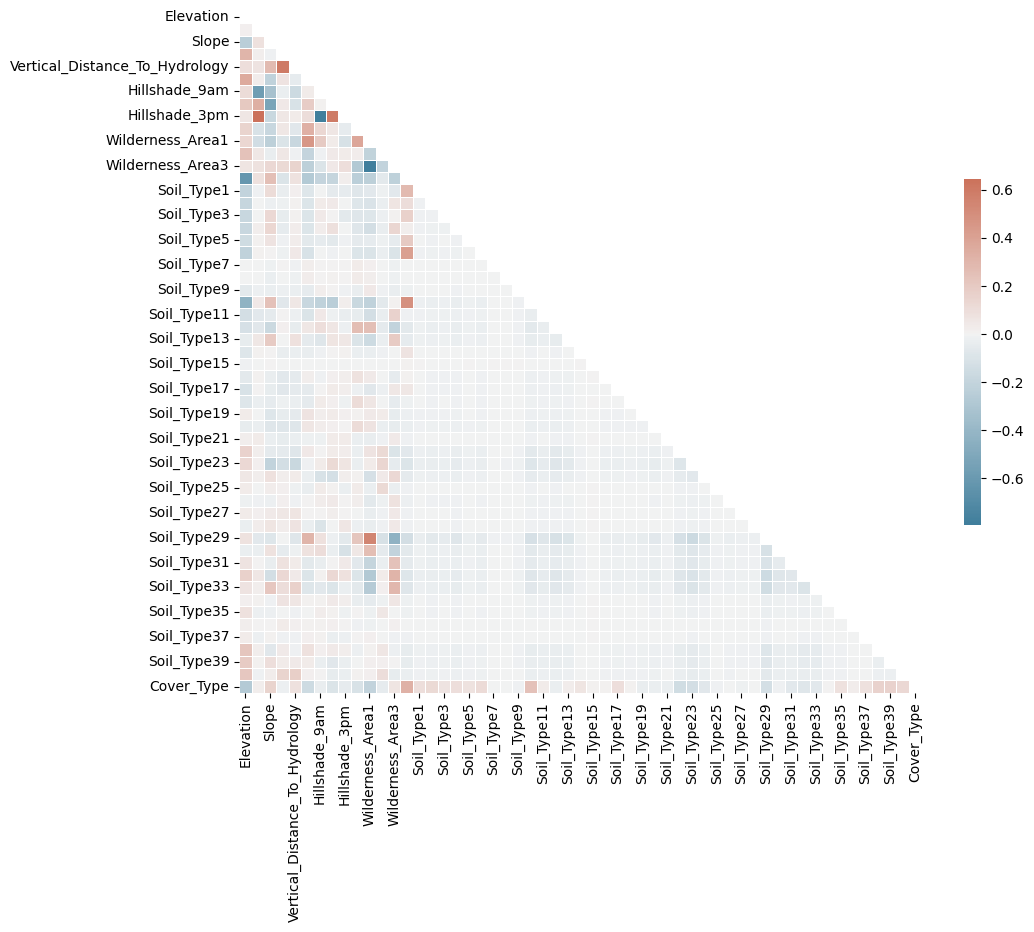

In [3]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})